Using the Cardiovascular Disease dataset collected from:
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset?select=cardio_train.csv

This python notebook visualises the examination of 2 columns, 3 columns and so forth to visualise the dimensionlity curse as the degree of freedom increases. It also emphasises the importance of tensors structures and multiway analysis to identify relationships between the various coordinates. 

Need to complete: the tensor structures/decomposition analysis.

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

cardio_pd = pd.read_csv('cardio_train.csv', delimiter=";")

print(cardio_pd)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [2]:
cardio_pd["height"]

0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 70000, dtype: int64

Text(0.5, 0, 'Entities/Objects')

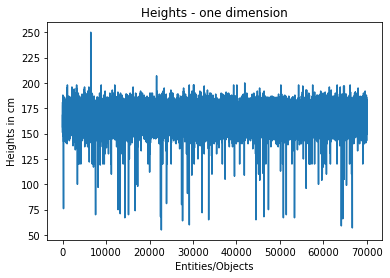

In [3]:
# degree of freedom is up and down the y-axis, the x-axis is the spread of the entities/objects

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(cardio_pd["height"])
ax.set_title('Heights - one dimension')
ax.set_ylabel('Heights in cm')
ax.set_xlabel('Entities/Objects')

# there is no covariance for one variable

[[ 67.40617492  34.38977399]
 [ 34.38977399 207.23781035]]


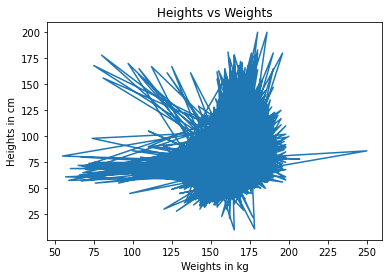

In [4]:
# two dimensions - degree of freedom is up and down the y-axis, diagonally as the combined degree of both dimensions. 
# Objects are now the individual dot in the plot and not an axis of its own
# Degree of freedom (DF) = Number of sample moments - Number of free parameters in the model.
# i.e DF= number of independent values – number of statistics

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(cardio_pd["height"], cardio_pd["weight"])
ax.set_title('Heights vs Weights')
ax.set_xlabel('Weights in kg')
ax.set_ylabel('Heights in cm')
# For K (=2 now) observed variables, the number of unique elements in the sample covariance matrix is K*(K+1)/2, = 2*3/2 = 3 
# There are 2*2=4 total elements in the covariance matrix, 
# but the matrix is symmetric about the diagonal, so only 3 values are unique. 
# comprised of K variances and K*(K-1)/2 covariances. = 2*1/2 = 1
# Add the 2 sample means to the unique elements in covariance matrix, and you have 3+2=5 sample moments.
# free parameters to estimate = 2 sample mean and 1 covariant
# DF = 5 - 3 = 2
covariance_2 = np.cov(cardio_pd["height"], cardio_pd["weight"])
print (covariance_2)

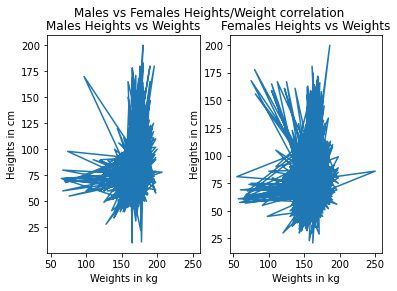

[[  0.22737449   1.95366615   1.06677332]
 [  1.95366615  67.40617492  34.38977399]
 [  1.06677332  34.38977399 207.23781035]]


In [5]:
# Now add the third dimension - in a second plot. The degree of freedom increases with the dimension, as data points can now
# appear in either of the two sub-plots, up and down the y-axis, and diagonally as the x-axis changes

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
males = cardio_pd[cardio_pd['gender']==2] #= 1 - women, 2 - men
ax.plot(males["height"], males["weight"])
ax.set_title('Males Heights vs Weights')
ax.set_xlabel('Weights in kg')
ax.set_ylabel('Heights in cm')

ax = axs[1]
females = cardio_pd[cardio_pd['gender']==1]
ax.plot(females["height"], females["weight"])
ax.set_title('Females Heights vs Weights')
ax.set_xlabel('Weights in kg')
ax.set_ylabel('Heights in cm')

fig.suptitle('Males vs Females Heights/Weight correlation')

plt.show()

# For K=3 now, K*(K+1)/2, = 3*4/2 = 6 unique values in the covariance matrix out of the 3x3 matrix elements because of symmetry
# K=3 variances and K*(K-1)/2, = 3*2/2 = 3 measuring three covariances between the 3 observed variables

# Add the 3 sample means to the unique elements in covariance matrix, and you have 3+6=9 sample moments.
# free parameters to estimate = 3 sample means and 3 covariances
# (DF) = Number of sample moments - Number of free parameters in the model.
# DF = 9 - 6 = 3

# Instead, we can consider the gender as a group. If there were multiple groups in the model, 
# then you would multiply the number of moments per group (variances, covariances and means (if means are requested in model)) by the number of groups.

covariance_3 = np.cov([cardio_pd["gender"],cardio_pd["height"], cardio_pd["weight"]])
print (covariance_3)

C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_6220/1969203979.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  healthymales = males[cardio_pd['cardio']==0] #= 0 - Healthy, 1 - Cardio
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_6220/1969203979.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cardiomales = males[cardio_pd['cardio']==1] #= 0 - Healthy, 1 - Cardio
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_6220/1969203979.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  healthyfemales = females[cardio_pd['cardio']==0] #= 0 - Healthy, 1 - Cardio
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_6220/1969203979.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cardiofemales = females[cardio_pd['cardio']==1] #= 0 - Healthy, 1 - Cardio


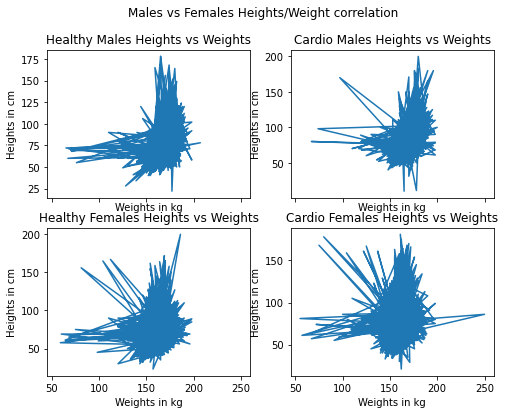

[[ 2.50003481e-01  1.93347048e-03 -4.44214374e-02  1.30757253e+00]
 [ 1.93347048e-03  2.27374493e-01  1.95366615e+00  1.06677332e+00]
 [-4.44214374e-02  1.95366615e+00  6.74061749e+01  3.43897740e+01]
 [ 1.30757253e+00  1.06677332e+00  3.43897740e+01  2.07237810e+02]]


In [9]:
# One more time you can add a fourth dimension - in another row of plots, keeping the column for the previous dimension. 
# The degree of freedom increases again with the extra dimension, as data points can now
# appear in any of the rows subplots, any of the columns of the two sub-plots, up and down the y-axis, 
# and diagonally as the x-axis changes in each of the sub-plots

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,6))
healthymales = males[cardio_pd['cardio']==0] #= 0 - Healthy, 1 - Cardio
# cardio - Target variable - Presence or absence of cardiovascular disease = 0 or 1
ax = axs[0, 0]
ax.plot(healthymales["height"], healthymales["weight"])
ax.set_title('Healthy Males Heights vs Weights')
ax.set_xlabel('Weights in kg')
ax.set_ylabel('Heights in cm')

ax = axs[0, 1]
cardiomales = males[cardio_pd['cardio']==1] #= 0 - Healthy, 1 - Cardio
ax.plot(cardiomales["height"], cardiomales["weight"])
ax.set_title('Cardio Males Heights vs Weights')
ax.set_xlabel('Weights in kg')
ax.set_ylabel('Heights in cm')

ax = axs[1, 0]
healthyfemales = females[cardio_pd['cardio']==0] #= 0 - Healthy, 1 - Cardio
ax.plot(healthyfemales["height"], healthyfemales["weight"])
ax.set_title('Healthy Females Heights vs Weights')
ax.set_xlabel('Weights in kg')
ax.set_ylabel('Heights in cm')

fig.suptitle('Males vs Females Heights/Weight correlation')

ax = axs[1, 1]
cardiofemales = females[cardio_pd['cardio']==1] #= 0 - Healthy, 1 - Cardio
ax.plot(cardiofemales["height"], cardiofemales["weight"])
ax.set_title('Cardio Females Heights vs Weights')
ax.set_xlabel('Weights in kg')
ax.set_ylabel('Heights in cm')

fig.suptitle('Males vs Females Heights/Weight correlation')

plt.show()

# For K=4 now, K*(K+1)/2, = 4*5/2 = 10 unique values in the covariance matrix out of the 4x4 matrix elements because of symmetry
# K=4 variances and K*(K-1)/2, = 4*3/2 = 6 measuring 4 covariances between the 4 observed variables

# Add the 4 sample means to the unique elements in covariance matrix, and you have 4+10=14 sample moments.
# free parameters to estimate = 4 sample means and 4 covariances
# (DF) = Number of sample moments - Number of free parameters in the model.
# DF = 14 - 8 = 6

# Instead, we can consider the cardio as a group.

covariance_4 = np.cov([cardio_pd["cardio"], cardio_pd["gender"],cardio_pd["height"], cardio_pd["weight"]])
print (covariance_4)

In [7]:
# Therefore a matrix (indexed by 2 indices) capturing many features along the x-axis, does not capture the structure in the 
# dataset, as a tensor of enough indices for each feature, to show multi-way relationships between the various features

# This exercise can go on, to show the multi-way interactions between the different variables in a dataset